In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
x=pd.read_csv('Churn_Modelling.csv')
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
columns_to_be_dropped=['RowNumber','Surname','Geography']

x.drop(columns=columns_to_be_dropped,inplace=True)

In [37]:
x['Gender']=x['Gender'].replace({'Male':0,'Female':1})

In [38]:
x.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,1,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,1,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,1,43,2,125510.82,1,1,1,79084.10,0


In [39]:
target=x['Exited']
x=x.drop('Exited',axis=1)


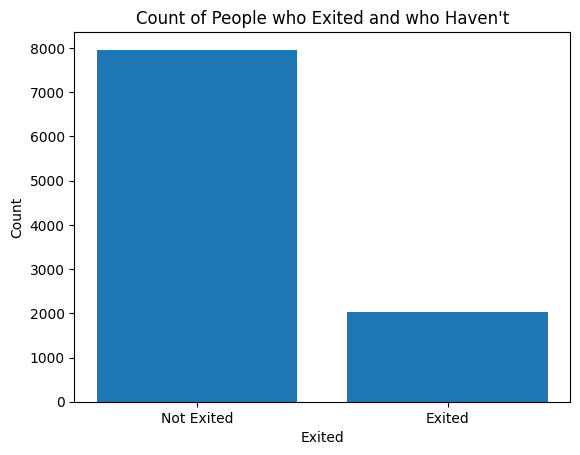

In [54]:
exit_counts = target.value_counts()

# Creating a bar plot
plt.bar(exit_counts.index, exit_counts.values)

# Adding labels and title
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Count of People who Exited and who Haven\'t')

# Customizing x-axis tick labels
plt.xticks([0, 1], ['Not Exited', 'Exited'])

# Displaying the plot
plt.show()

In [40]:
np.random.seed(42)
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,target)

In [41]:

#Applying Standardization (Feature Scaling) on the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
     

In [42]:
#Performing oversampling on the imbalanced data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)

In [58]:
# importing and fitting model

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

model.fit(x_train_resampled,y_train_resampled)

LogisticRegression()

In [59]:
model.score(x_test,y_test)

0.7012

In [62]:

y_pred=model.predict(x_test)

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.70      0.79      2003
           1       0.37      0.69      0.48       497

    accuracy                           0.70      2500
   macro avg       0.63      0.70      0.63      2500
weighted avg       0.80      0.70      0.73      2500

